# Tratando dados string para ML

Usaremos duas tecnicas para isso

- dummys
- one hot encoding


In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_excel('dados.xlsx')


In [2]:
df.head()


,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    object 
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    object 
 6   PAIS         986 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.0+ KB


In [4]:
df.describe()

,KM-LITRO,CILINDROS,PESO(KG),CAVALOS
count,984.000000,986.000000,986.000000,986.000000
mean,8.209553,6.115619,1959.432049,262.622718
std,3.718411,2.764683,459.769620,209.544669
min,3.000000,3.000000,1200.000000,116.000000
25%,4.500000,4.000000,1700.000000,118.000000
50%,8.000000,4.000000,1700.000000,118.000000
75%,11.000000,8.000000,2300.000000,340.000000
max,14.000000,12.000000,3000.000000,1800.000000


In [5]:
df['PAIS'].value_counts()


PAIS
BRASIL        99
EUA           99
ESPANHA       99
CANADA        99
INGLATERRA    99
ALEMANHA      99
AUSTRALIA     98
NORUEGA       98
BELGICA       98
HOLANDA       98
Name: count, dtype: int64

In [6]:
df.groupby('TRANSMISSAO').size()

TRANSMISSAO
AUTOMATICO    536
MANUAL        450
dtype: int64

In [7]:
df.groupby('MODELO').size()

MODELO
ASTON MARTIN     66
BMW X1           30
BMW X5           36
COROLLA          36
CORSA            42
CRETA            36
FERRARI          54
GOL              24
HB20             30
HONDA FIT        66
JEEP COMPASS     36
JEEP RENEGADE    24
LABORGUINI       50
MERCEDES SL80    66
MOBI             66
PAJERO           36
PALIO            66
PARATI           24
PASSAT           66
SAVEIRO          42
UNO              66
VECTRA           24
dtype: int64

# Metodo One Hot Encoding


In [8]:
! pip install scikit-learn


In [9]:
df = pd.read_excel('./dados.xlsx')

df.shape


(986, 7)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    object 
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    object 
 6   PAIS         986 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.0+ KB


In [11]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()
for serie in ['PAIS', 'MODELO', 'TRANSMISSAO']:
    df[serie] = lb.fit_transform(df[serie])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    int64  
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    int64  
 6   PAIS         986 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 54.0 KB


In [15]:
df['PAIS'].value_counts()

PAIS
3    99
6    99
5    99
4    99
8    99
0    99
1    98
9    98
2    98
7    98
Name: count, dtype: int64

In [16]:
df.groupby('MODELO').size()

MODELO
0     66
1     30
2     36
3     36
4     42
5     36
6     54
7     24
8     30
9     66
10    36
11    24
12    50
13    66
14    66
15    36
16    66
17    24
18    66
19    42
20    66
21    24
dtype: int64

In [17]:
df_dados = pd.read_excel('./dados.xlsx')

legendas = {}

for var in ['PAIS', 'MODELO', 'TRANSMISSAO']:
    lb = LabelEncoder()

    dados_originais = df_dados[var].copy()
    df_dados[var] = lb.fit_transform(dados_originais)

    legenda_var = dict(zip(lb.classes_, lb.transform(lb.classes_)))
    legendas[var] = legenda_var

for var, mapa in legendas.items():
    print(f'Legendas para {var}:')
    for k, v in mapa.items():
        print(f'{k} : {v}')
    


Legendas para PAIS:
ALEMANHA : 0
AUSTRALIA : 1
BELGICA : 2
BRASIL : 3
CANADA : 4
ESPANHA : 5
EUA : 6
HOLANDA : 7
INGLATERRA : 8
NORUEGA : 9
Legendas para MODELO:
ASTON MARTIN : 0
BMW X1 : 1
BMW X5 : 2
COROLLA : 3
CORSA : 4
CRETA : 5
FERRARI : 6
GOL : 7
HB20 : 8
HONDA FIT : 9
JEEP COMPASS : 10
JEEP RENEGADE : 11
LABORGUINI : 12
MERCEDES SL80 : 13
MOBI : 14
PAJERO : 15
PALIO : 16
PARATI : 17
PASSAT : 18
SAVEIRO : 19
UNO : 20
VECTRA : 21
Legendas para TRANSMISSAO:
AUTOMATICO : 0
MANUAL : 1


---

- como fazer a legenda

In [29]:
pessoas = {
    'Lucian0o': {'idade': 31, 'altura': 1.78},
    'Fernanda': {'idade': 18, 'altura': 1.61}
}

print(pessoas['Fernanda']['altura'])

1.61


In [33]:
pessoas = {
    'Lucian0o': {'idade': 31, 'altura': 1.78},
    'Fernanda': {'idade': 18, 'altura': 1.61}
}

for nome, segundo_dicionario in pessoas.items():
    print(f'nome: {nome}, dict: {segundo_dicionario}')
    for chave, valor in segundo_dicionario.items():
        print(f'{chave}: {valor}')

nome: Lucian0o, dict: {'idade': 31, 'altura': 1.78}
idade: 31
altura: 1.78
nome: Fernanda, dict: {'idade': 18, 'altura': 1.61}
idade: 18
altura: 1.61


---

In [18]:
df_dados.describe()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
count,986.000000,984.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,10.855984,8.209553,6.115619,1959.432049,262.622718,0.456389,4.498986
std,6.333342,3.718411,2.764683,459.769620,209.544669,0.498347,2.871618
min,0.000000,3.000000,3.000000,1200.000000,116.000000,0.000000,0.000000
25%,6.000000,4.500000,4.000000,1700.000000,118.000000,0.000000,2.000000
50%,12.000000,8.000000,4.000000,1700.000000,118.000000,0.000000,4.500000
75%,16.000000,11.000000,8.000000,2300.000000,340.000000,1.000000,7.000000
max,21.000000,14.000000,12.000000,3000.000000,1800.000000,1.000000,9.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt

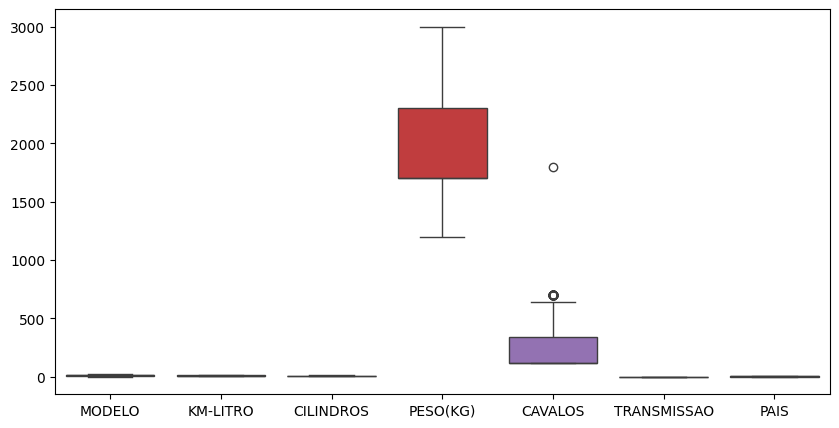

In [ ]:
plt.figure(figsize=(10,5))
ax = sn.boxplot(data=df_dados)

In [21]:
padronizar = StandardScaler().fit(df_dados)

df_padronizado = padronizar.transform(df_dados)

In [22]:
df_padronizado

array([[ 0.18072557, -1.40172823,  2.12949108, ...,  2.08833394,
        -0.91627083, -0.52226527],
       [ 0.18072557, -1.40172823,  2.12949108, ...,  2.08833394,
        -0.91627083,  0.52297199],
       [ 0.18072557, -1.40172823,  2.12949108, ...,  2.08833394,
        -0.91627083,  0.17455957],
       ...,
       [ 1.44452282,  1.42349437, -0.76561848, ..., -0.69052633,
         1.09138037, -0.17385285],
       [ 0.49667488,  1.55802878, -0.76561848, ..., -0.69052633,
         1.09138037,  1.21979682],
       [ 1.1285735 , -0.05638414, -0.04184109, ..., -0.69052633,
         1.09138037, -1.56750252]])

In [ ]:
df_padronizado = pd.DataFrame(df_padronizado)

df_padronizado.columns = df_dados.columns

df_padronizado

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,-0.522265
1,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.522972
2,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.174560
3,-0.767122,-1.401728,2.129491,-1.217384,1.801854,-0.916271,-0.173853
4,-1.714970,-1.267194,1.405714,-0.782162,1.706360,-0.916271,1.219797
5,0.338700,-0.998125,0.681936,-0.564552,1.037906,-0.916271,-1.567503
6,-0.293198,1.019891,-0.765618,-0.564552,-0.700076,-0.916271,-1.219090
7,0.812624,0.750822,-0.765618,-0.564552,-0.690526,1.091380,1.568209
8,1.444523,1.423494,-0.765618,-0.564552,-0.690526,1.091380,-0.870678
9,0.496675,1.558029,-0.765618,-0.564552,-0.690526,1.091380,0.871384


In [24]:
df_padronizado.describe()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
count,9.860000e+02,9.840000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02
mean,1.171026e-17,-3.402879e-16,-1.981737e-17,2.071816e-17,9.908684e-17,-6.305526e-17,-1.076443e-16
std,1.000507e+00,1.000509e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00
min,-1.714970e+00,-1.401728e+00,-1.127507e+00,-1.652605e+00,-7.000757e-01,-9.162708e-01,-1.567503e+00
25%,-7.671224e-01,-9.981250e-01,-7.656185e-01,-5.645517e-01,-6.905263e-01,-9.162708e-01,-8.706777e-01
50%,1.807256e-01,-5.638414e-02,-7.656185e-01,-5.645517e-01,-6.905263e-01,-9.162708e-01,3.533594e-04
75%,8.126242e-01,7.508223e-01,6.819363e-01,7.411120e-01,3.694513e-01,1.091380e+00,8.713844e-01
max,1.602497e+00,1.558029e+00,2.129491e+00,2.264386e+00,7.340475e+00,1.091380e+00,1.568209e+00


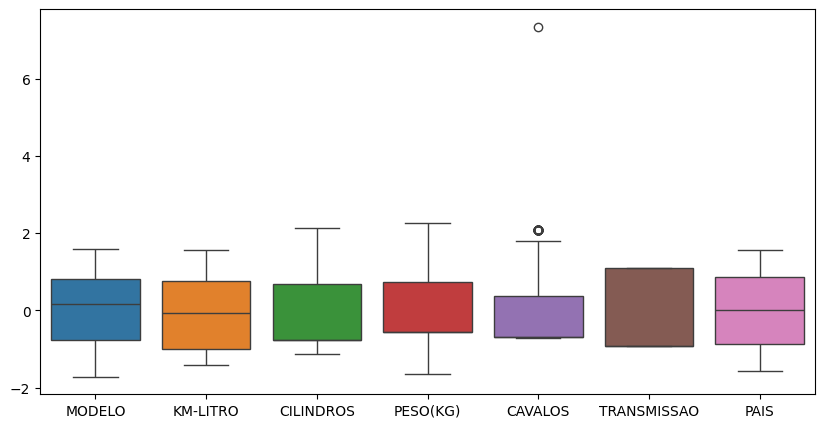

In [40]:
plt.figure(figsize=(10,5))
ax = sn.boxplot(data=df_padronizado)

In [41]:
normalizar = MinMaxScaler().fit(df_dados)

df_normalizado = normalizar.transform(df_dados)

In [42]:
df_normalizado

array([[0.57142857, 0.        , 1.        , ..., 0.34679335, 0.        ,
        0.33333333],
       [0.57142857, 0.        , 1.        , ..., 0.34679335, 0.        ,
        0.66666667],
       [0.57142857, 0.        , 1.        , ..., 0.34679335, 0.        ,
        0.55555556],
       ...,
       [0.95238095, 0.95454545, 0.11111111, ..., 0.00118765, 1.        ,
        0.44444444],
       [0.66666667, 1.        , 0.11111111, ..., 0.00118765, 1.        ,
        0.88888889],
       [0.85714286, 0.45454545, 0.33333333, ..., 0.00118765, 1.        ,
        0.        ]])

In [43]:
df_normalizado = pd.DataFrame(df_normalizado)

df_normalizado.columns = df_dados.columns

df_normalizado

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.333333
1,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.666667
2,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.555556
3,0.285714,0.000000,1.000000,0.111111,0.311164,0.0,0.444444
4,0.000000,0.045455,0.777778,0.222222,0.299287,0.0,0.888889
5,0.619048,0.136364,0.555556,0.277778,0.216152,0.0,0.000000
6,0.428571,0.818182,0.111111,0.277778,0.000000,0.0,0.111111
7,0.761905,0.727273,0.111111,0.277778,0.001188,1.0,1.000000
8,0.952381,0.954545,0.111111,0.277778,0.001188,1.0,0.222222
9,0.666667,1.000000,0.111111,0.277778,0.001188,1.0,0.777778


In [44]:
df_normalizado.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.333333
1,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.666667
2,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.555556
3,0.285714,0.000000,1.000000,0.111111,0.311164,0.0,0.444444
4,0.000000,0.045455,0.777778,0.222222,0.299287,0.0,0.888889


In [45]:
df_normalizado.describe()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
count,986.000000,984.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.516952,0.473596,0.346180,0.421907,0.087068,0.456389,0.499887
std,0.301588,0.338037,0.307187,0.255428,0.124433,0.498347,0.319069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.136364,0.111111,0.277778,0.001188,0.000000,0.222222
50%,0.571429,0.454545,0.111111,0.277778,0.001188,0.000000,0.500000
75%,0.761905,0.727273,0.555556,0.611111,0.133017,1.000000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# df_dados (original)
# df_padronizado
# df_normalizado

In [46]:
df_dados.corr()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
MODELO,1.000000,0.428497,-0.361893,-0.122851,-0.403278,0.607556,0.008756
KM-LITRO,0.428497,1.000000,-0.815090,0.034760,-0.788358,0.641490,-0.007238
CILINDROS,-0.361893,-0.815090,1.000000,-0.311150,0.924733,-0.626354,0.009733
PESO(KG),-0.122851,0.034760,-0.311150,1.000000,-0.382107,-0.121160,-0.013565
CAVALOS,-0.403278,-0.788358,0.924733,-0.382107,1.000000,-0.616357,0.018298
TRANSMISSAO,0.607556,0.641490,-0.626354,-0.121160,-0.616357,1.000000,0.006709
PAIS,0.008756,-0.007238,0.009733,-0.013565,0.018298,0.006709,1.000000


Text(0.5, 1.0, 'Matrix de correlação')

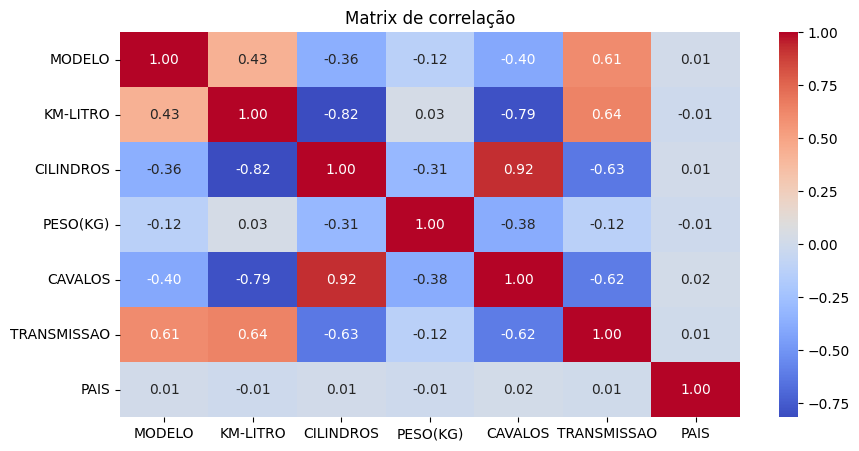

In [ ]:
matrix = df_dados.corr()

plt.figure(figsize=(10,5))
sn.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix de correlação')